# Programming Excercise 1:Linear Regression
## Introduction
In this exercise ,you will implement linear regression and get to see it work on data.
### 1 Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.  
You would like to use this data to help you select which city to expand
to next.  
The file ex1data1.txt contains the dataset for our linear regression prob-
lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a loss.  
The ex1.m script has already been set up to load this data for you.
### 1.1 Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.)  
In ex1.m, the dataset is loaded from the data file into the variables X and y:

In [668]:
import numpy as np
#绘图库
import matplotlib.pyplot as plt
#axes3d()主要包含实现绘图的类和方法。绘制３D图
from mpl_toolkits.mplot3d import Axes3D
#取颜色，colormap
from matplotlib import cm
%matplotlib inline

In [669]:
#从文件中读取数据，存在numpy数组中
#-column 1:population(x)
#-column 2:profit(y)
data=np.loadtxt('ex1data1.txt',delimiter=',') #delimiter是分隔符，type:nump.ndarray
#x=data[:,0]  这取出来不是一个列向量，只是一个数组
m=data.shape[0]     #number of training examples
print("The number of training example: "+ str(m))

#Split data into variables x and y
#The usage of np.hsplit
# -np.hsplit(a,3) #split a into 3
# -np.hsplit(a,(3,4)) #就是把前三列给第一个参数，第四列给第二个参数，剩下的给第三个参数
x,y=np.hsplit(data,2)
#print out some data points
print ("First 10 examples from the dataset:")
for i in range(10):
    print('x[',i,']=',x[i],',',"y[",i,"]=",y[i])
    

The number of training example: 97
First 10 examples from the dataset:
x[ 0 ]= [ 6.1101] , y[ 0 ]= [ 17.592]
x[ 1 ]= [ 5.5277] , y[ 1 ]= [ 9.1302]
x[ 2 ]= [ 8.5186] , y[ 2 ]= [ 13.662]
x[ 3 ]= [ 7.0032] , y[ 3 ]= [ 11.854]
x[ 4 ]= [ 5.8598] , y[ 4 ]= [ 6.8233]
x[ 5 ]= [ 8.3829] , y[ 5 ]= [ 11.886]
x[ 6 ]= [ 7.4764] , y[ 6 ]= [ 4.3483]
x[ 7 ]= [ 8.5781] , y[ 7 ]= [ 12.]
x[ 8 ]= [ 6.4862] , y[ 8 ]= [ 6.5987]
x[ 9 ]= [ 5.0546] , y[ 9 ]= [ 3.8166]


Next, the script calls the plotData function to create a scatter plot of
the data. Your job is to complete plotData.m to draw the plot; modify the
file and fill in the following code:

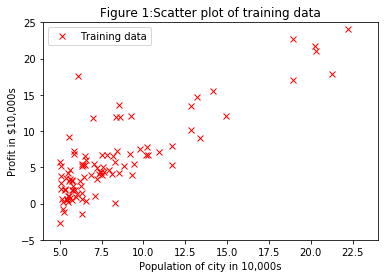

In [670]:
#plot data
plt.plot(x,y,'rx',label="Training data")
#plt.plot(data[:,0],data[:,1],'ro') #这里可以改一下，出现的数据个数
plt.xlabel("Population of city in 10,000s") #set the x-axis label
plt.ylabel("Profit in $10,000s")  #set the y-axis label
plt.legend()
plt.xlim(4,24) #用来限制x轴范围
plt.ylim(-5,25)
#plotData(x,y,"Training data")
plt.title("Figure 1:Scatter plot of training data")
plt.show()

### 1.2 Gradient Descent
In this part,you will fit the linear regression parameters θ to our dataset using gradient descent.
### 1.2.1 Update Equations
The objective of linear regression is to minimize the cost function  
$J(\theta )=\frac{1}{2m}\sum_{i=1}^{m}{({h}_{\theta}({x}^{(i)})-             {y}^{(i)})}^{2}$  
where the hypothesis ${h}_{\theta}(x)$ is given by the linear model  
${h}^{\theta}(x)={\theta}^{T}x={\theta}_{0}+{\theta}_{1}{x}_{1}$  
Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration peforms the update  
${\theta}_{j} := {\theta}_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}({h}_{\theta}({x}^{(i)})-{y}^{(i)}){{x}_{j}}^{(i)}$  (simultaneously update${\theta}_{j}$for all j).  

With each step of gradient descent, your parameter $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$  

Implementation Note: We store each example as a row in the $X$ matrix. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
### 1.2.2 Implementation
In ex1.m, we have already set up the data for linear regression. In the
following lines, we add another dimension to our data to accommodate the
${\theta}_{0}$intercept term. We also initialize the initial parameters to 0 and the
learning rate alpha to 0.01.

In [671]:
x = np.hstack((np.ones((m,1),dtype=x.dtype),x))  #Add a column of ones to x.注意运行多次会叠加

#this statement is used to judge.断言　assert,后面语句为真，否则出现AssertionError
assert(x.shape[1]==2)  

#print(x)
theta=np.zeros((2,1))             #initialize fitting parameters

iterations = 1500
alpha = 0.01

### 1.2.3 Computing the cost J(\theta)
As you perform gradient descent to learn minimize the cost function J(θ),it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation.

Your next task is to complete the code in the file computeCost.m, which is a function that computes J(θ). As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set. 

Once you have completed the function, the next step in ex1.m will run computeCost once using θ initialized to zeros, and you will see the cost printed to the screen.You should expect to see a cost of 32.07.  
You should now submit your solutions.

In [672]:
def computeCost(x,y,theta):
    """
    compute cost for linear regression
    J=computeCost(x,y,theta) computes the cost of using theta as the 
    parameter for linear regression to fit the data points in x and y.
    """
    #Initialize some useful values
    m=x.shape[0]
    
    #You need to return the following variables correctly
    J=0
    H=np.dot(x,theta)-y
    J = np.sum(np.power(H,2))/(2*m) #这里np.sum是将所有元素就和
    
    return J

In [673]:
print ("Tesing the cost function...")
#Compute and display initial cost
J=computeCost(x,y,np.array([[0],[0]]))
print("With theta=[[0],[0]]\nCost computed= " + str(J))
print("Expect cost value (approx) 32.07")

#Furtherf testing of the cost function
J = computeCost(x,y,np.array([[-1],[2]]))
print("With theta = [[-1],[2]]\nCost computed= " + str(J))
print("Expected cost value (approx) 54.24")

Tesing the cost function...
With theta=[[0],[0]]
Cost computed= 32.0727338775
Expect cost value (approx) 32.07
With theta = [[-1],[2]]
Cost computed= 54.242455082
Expected cost value (approx) 54.24


### 1.2.4 Gradient descent
Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

As you program, make sure you understand what you are trying to opti-
mize and what is being updated. Keep in mind that the cost J(θ) is parame-
terized by the vector θ, not X and y. That is, we minimize the value of J(θ)
by changing the values of the vector θ, not by changing X or y. Refer to the
equations in this handout and to the video lectures if you are uncertain.

A good way to verify that gradient descent is working correctly is to look
at the value of J(θ) and check that it is decreasing with each step. The
starter code for gradientDescent.m calls computeCost on every iteration
and prints the cost. Assuming you have implemented gradient descent and
computeCost correctly, your value of J(θ) should never increase, and should
converge to a steady value by the end of the algorithm.

After you are finished, ex1.m will use your final parameters to plot the
linear fit. The result should look something like Figure 2:Your final values for θ will also be used to make predictions on profits inareas of 35,000 and 70,000 people. Note the way that the following lines inex1.m uses matrix multiplication, rather than explicit summation or loop-
ing, to calculate the predictions. 

In [674]:
def gradientDescent(x,y,theta,alpha,num_iters):
    """
    gradientDescent performs grdient descent to learn theta.
    theta = gradientDescent(x,y,theta,alpha,num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    """
    # Initialize some useful values
    m=x.shape[0]  #number of training examples
    J_history=np.zeros((num_iters,1))
    for iter in range(num_iters):   #num_iters是迭代次数，为什么要来个迭代次数？其实这里迭代次数是人为的，观察J的变化趋势来定迭代次数
                                    #因为是线性的所以只有一个极小值，所以当J达到了最小时，迭代次数再多，也不在更新，theta值不变了
        #Perform a single gradient step on the parameter vector theta
        #while debugging,it can be useful to print out the values
        #of the cost function (computeCost) and gradient here.
        #这里用矩阵批量处理，一个公式就可以，注意求和号的，
        Sigma = np.sum(np.multiply((np.dot(x,theta)-y),x),axis=0,keepdims=True)
        #keepdims就是保证Sigma是一行两列的数组
        theta=theta-alpha * Sigma.T/m   #注意这里要的是Sigma的转置　这里的目的是跟新theta值
        #Save the cost J in every iteration
        J_history[iter]=computeCost(x,y,theta) #这条语句作用是来观察J的变化趋势，可以来定迭代次数
        #print("J=",J_history)　　＃这里J_history是打印了所有的
        #print("J=",J_history[iter]) #这里J_history[iter]是只打印更新的值
    return theta, J_history

In [675]:
#run gradient descent
theta,J_history=gradientDescent(x,y,theta,alpha,iterations)

#print theta to screen
print("Theta found by gradient desent:" )
print(theta)  #这里打印出的theta就是J最小时候的theta
print("Expected theta values (approx): ")
print(np.array([[-3.6303],[1.1664]]))

Theta found by gradient desent:
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx): 
[[-3.6303]
 [ 1.1664]]


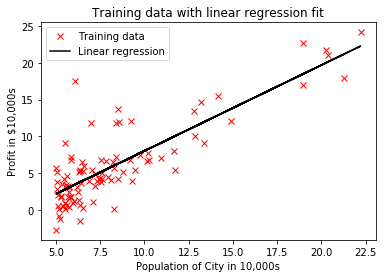

In [676]:
#plot the linear fit
#这个画图其实可以定义为一个函数，到时候用的时候直接调用就可以
"""
def plotData(X, y, labelStr):
    plt.plot(X, y, 'rx', label=labelStr)
    plt.xlabel("Population of City in 10,000s") # set the x-axis label
    plt.ylabel("Profit in $10,000s")  # set the y-axis label
    plt.legend()
#然后用的时候调用
plotData(x[:,1],y,"Training data")
"""
plt.plot(x[:,1],y,'rx',label="Training data")  #注意这里的x是两列，取第一列
plt.plot(x[:,1],np.dot(x,theta),'k-',label="Linear regression")

plt.xlabel("Population of City in 10,000s")   #set the x-axis lable
plt.ylabel("Profit in $10,000s")        #set the y-axis label
plt.legend()
plt.title("Training data with linear regression fit")
plt.show()

In [677]:
#Predict values for population sizes of 35,000 and 70,000
predict = np.dot(np.array([[1,3.5]]),theta)
print("For population = 35,000, we predict a profit of " + str(float(predict*10000)))
predict = np.dot(np.array([[1,7]]),theta)
print("For population = 70,000, we predict a profit of " + str(float(predict*10000)))

For population = 35,000, we predict a profit of 4519.7678677017675
For population = 70,000, we predict a profit of 45342.45012944714


### 1.3 Visualizing J(\theta)
To understand the cost function J(θ) better, you will now plot the cost over
a 2-dimensional grid of θ 0 and θ 1 values. You will not need to code anything
new for this part, but you should understand how the code you have written
already is creating these images.

In the next step of ex1.m, there is code set up to calculate J(θ) over a
grid of values using the computeCost function that you wrote.

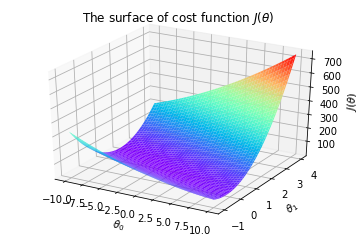

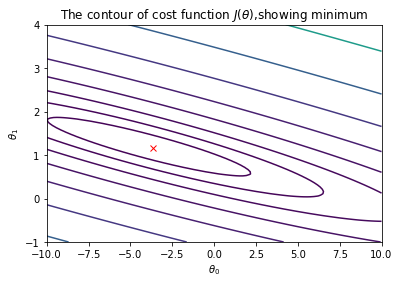

[[-3.63029144]
 [ 1.16636235]] 
 [-3.63029144] [ 1.16636235]


In [678]:
#Visualizing J(theta_0, theta_1)
#Grid over which we will calulate
theta0_vals = np.linspace(-10,10,100) #这里把theta0_vals和theta1_vals分成了一个数组
theta1_vals = np.linspace(-1,4,100)
#print(theta0_vals.shape[0])
#print(type(theta0_vals))
#print(theta0_vals[5])
#initialize J_vals to a matrix of zeros
J_vals = np.zeros((theta0_vals.shape[0],theta1_vals.shape[0]))

#Fill out J_vals
for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]):
        t=np.array([[theta0_vals[i]],[theta1_vals[j]]])
        J_vals[i][j] = computeCost(x,y,t)
#Make the meshgrid 做成网格
theta0_vals,theta1_vals = np.meshgrid(theta0_vals,theta1_vals)

#surface plot
figSurf = plt.figure()
ax=figSurf.gca(projection='3d')

#Because of the way meshgrids work in the surf command,we need to 
#transpose J_vals before calling surf, or else the axes will be flipped
surf = ax.plot_surface(theta0_vals,theta1_vals,J_vals.T,cmap='rainbow')
ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\theta_1$")
ax.set_zlabel(r"$J(\theta)$")
plt.title(r"The surface of cost function $J(\theta)$")
plt.show()
#具体函数方法可用　help(function)查看，如：help(ax.plot_surface)

#Contour plot 画等高线图
figContour = plt.figure()
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals,theta1_vals,J_vals.T,levels=np.logspace(-2,3,20))
#Plot optimum
plt.plot(theta[0],theta[1],'rx')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title(r"The contour of cost function $J(\theta)$,showing minimum")
plt.show()
print (theta,'\n',theta[0],theta[1])

The purpose of these graphs is to show you that how J(θ)J(θ) varies with changes in θ0θ0 and θ1θ1. The cost function J(θ)J(θ) is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for θ0θ0 and θ1θ1, and each step of gradient descent moves closer to this point.

### 2.Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

The ex1 multi.m script has been set up to help you step through this exercise.

In [679]:
#Load data from CSV file
# - column 1:house size in feet**2 (x1)
# - column 2:number of bedrooms (x2)
# - column 3:house price (y)
data = np.loadtxt('ex1data2.txt',delimiter=',')
#print(data)
#Separate features X and labels y
X,y = np.hsplit(data,np.array([2])) #先给X分，分完剩下的给Y
#print(X)
#print(y)

#The number of training examples
m = X.shape[0]

#Print out some data point
print("First 10 examples from the dataset:")
for i in range(10):
    print("x = " + str(X[i,:]) + ", y= " + str(y[i]))
#也可以用这种方法，把数组转化为矩阵
"""
xm=np.mat(X)
ym=np.mat(y)
print(xm[:10,:2])
print(ym[:10])
print(type(ym)) 这里xm,ym都是matrix类型
"""

First 10 examples from the dataset:
x = [ 2104.     3.], y= [ 399900.]
x = [ 1600.     3.], y= [ 329900.]
x = [ 2400.     3.], y= [ 369000.]
x = [ 1416.     2.], y= [ 232000.]
x = [ 3000.     4.], y= [ 539900.]
x = [ 1985.     4.], y= [ 299900.]
x = [ 1534.     3.], y= [ 314900.]
x = [ 1427.     3.], y= [ 198999.]
x = [ 1380.     3.], y= [ 212000.]
x = [ 1494.     3.], y= [ 242500.]


'\nxm=np.mat(X)\nym=np.mat(y)\nprint(xm[:10,:2])\nprint(ym[:10])\nprint(type(ym)) 这里xm,ym都是matrix类型\n'

### 2.1 Feature Nomalization
We will start by loading and displaying some values from this dataset. By looking at the number of bedrooms. When features differ by order of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to complete the code of `featureNormalize` function to
 - Substract the mean value of each feature from the dataset.
 - After substracting the mean, additionally scale (divide) the feature values by their respective "standard deviation".

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within $\pm$2 standard deviations of the mean); this is an alternative to taking the range of values (max $-$ min). In NumPy, you can use the `numpy.std()` function to compute the standard deviation.

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

**Implementation Note:** When normalizing the features, it is important to store the values used for normalization - the *mean value* and the *standard deviatioin* used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new $\mathbf{x}$ value (living room area and number of bedrooms), we must first normalize $\mathbf{x}$ using the mean and standard deviation that we had previously computed from the traing set.

In [680]:
def featureNormalize(X):
    """
    featureNormalize(X) returns a normalized version of X where the mean value of each feature is
    0 and the standard deviation is 1.This is often a good preprocessing step to do when working 
    with learning alagorithms.
    Return:
        - X_norm # the normalized features
        - mu     # mean
        - sigma  # standard deviation
    """
    
    mu = np.mean(X, axis=0)  #mean 求平均值,列
    sigma = np.std(X, axis=0)#standard deviation 标准差
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [681]:
#Feature normalization
X, mu ,sigma = featureNormalize(X)

#Add intercept term to X
X = np.hstack((np.ones((m,1),dtype=X.dtype), X))
#print(X)
assert(X.shape[1] == 3)

### 2.2 Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update rule remain unchanged.

You should implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.

**Implementation Note:** In the multivariate case, the cost function can also be written in the following vectorized form:
$$J(\theta)=\frac{1}{2m}{(X\theta-\vec{y})}^{T}(X\theta-\vec{y})$$
where
$$X = \left[\begin{array}{c} -(x^{(1)})^T- \\ -(x^{(2)})^T- \\ \vdots \\ -(x^{(m)})^T- \end{array}\right] \qquad \vec{y} = \left[\begin{array}{c}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \end{array}\right]$$

The vectorized version is different when you're working with numerical computing tools. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.

In [682]:
#用这种方法去重新定义代价函数
def computeCostMulti(X, y, theta):
    """
    ComputeCostMulti Compute cost for linear regression with multiple variables
    J=compuateCost(X,y,theta) computes the cost of using theta as the 
    parameter for linear regression to fit the data points in X and y.
    """
    #Initialize some useful values
    m = X.shape[0]   #number of training examples
    #you need to return the following variables correctly
    
    J = np.dot((np.dot(X,theta)-y).T,np.dot(X,theta)-y)/(2*m) #其实这和前面的一样，奥！
    #J=np.squeeze(J)
    return J


In [683]:
#定义梯度下降函数
def gradientDescentMulti(X,y,theta,alpha,num_iters):
    """
    gradientDescent performs grdient descent to learn theta.
    theta = gradientDescentMulti(x,y,theta,alpha,num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    """
    # Initialize some useful values
    m=X.shape[0]  #number of training examples
    J_history=np.zeros((num_iters,1))
    for iter in range(num_iters):   #num_iters是迭代次数，为什么要来个迭代次数？其实这里迭代次数是人为的，观察J的变化趋势来定迭代次数
                                    #因为是线性的所以只有一个极小值，所以当J达到了最小时，迭代次数再多，也不在更新，theta值不变了
        #Perform a single gradient step on the parameter vector theta
        #while debugging,it can be useful to print out the values
        #of the cost function (computeCost) and gradient here.
        #这里用矩阵批量处理，一个公式就可以，注意求和号的，
        Sigma = np.sum(np.multiply((np.dot(X,theta)-y),X),axis=0,keepdims=True)
        #keepdims就是保证Sigma是一行两列的数组
        theta=theta-alpha * Sigma.T/m   #注意这里要的是Sigma的转置　这里的目的是跟新theta值
        #Save the cost J in every iteration
        J_history[iter]=computeCostMulti(X,y,theta) #这条语句作用是来观察J的变化趋势，可以来定迭代次数
        #print("J=",J_history)　　＃这里J_history是打印了所有的
        #print("J=",J_history[iter]) #这里J_history[iter]是只打印更新的值
    return theta, J_history


In [684]:
print("Running gradient descent .....")
alpha = 0.03 #learning rate
num_iters = 400 #number of iterations

#Init theta and run gradient descent
theta = np.zeros((3,1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
#theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
#Display gradient descent's result
print("Theta computed from gradient descent:")
print(theta)

Running gradient descent .....
Theta computed from gradient descent:
[[ 340410.91897274]
 [ 109162.68848142]
 [  -6293.24735132]]


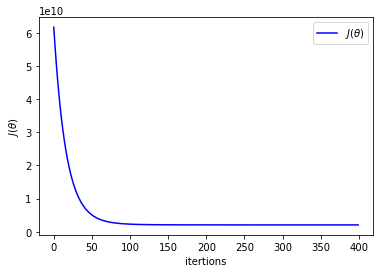

In [685]:
#Plot the convergence graph of J(theta)
#Use 'r' before the string to denote it is "raw"
plt.plot(range(num_iters),J_history,'b-',label=(r"$J(\theta)$"))
plt.xlabel("itertions")
plt.ylabel(r"$J(\theta)$")
plt.legend()
plt.show()

In [686]:
#Estimate the price of a 1650 sq-ft,3 br house
#Recall that the first column of X is all-ones.Thus,it does not need 
#to be normalized.
fnData = (np.array([[1650,3]])-mu) / sigma
price  = np.squeeze(np.dot(np.hstack(([[1]],fnData)),theta))
print("Predicted price of a 1650 sq-ft,3 br house (using a gradient descent):")
print(price)

Predicted price of a 1650 sq-ft,3 br house (using a gradient descent):
293142.4334854096


### 2.2.1 Selecting learning rates
In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly.

The next phase is to call `gradientDescent` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$. After the last iteration, plot the $J$ values against the number of the iterations.

We recommend trying values of the learing rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and 'blow up', resulting in values which are too large for computer calculations.

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!

Using the beset learning rate that you found, run gradient descent until convergence to find the final values of $\theta$. Next, use this value of $\theta$ to predict the price of a house with 1650 square feet and 3 bedrooms. You will use value later to check your implementation of the normal equations. Don't forget to normalize your features when you make this prediction!

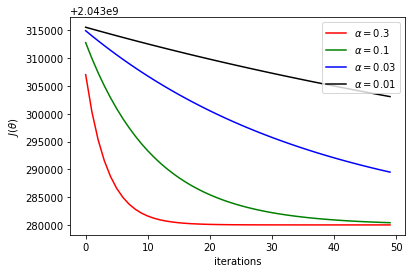

In [687]:
alpha = np.array([0.3,0.1,0.03,0.01])
color = ['r', 'g', 'b', 'k']
num_iters = 50
initTheta = theta
for i in range(alpha.shape[0]):
    theta, J_history = gradientDescentMulti(X,y,initTheta,alpha[i],num_iters)
    plt.plot(range(num_iters),J_history,color[i]+'-',label=r"$\alpha ="+str(alpha[i])+"$")
    plt.xlabel("iterations")
    plt.ylabel(r"$J(\theta)$")
    plt.legend()

plt.show()

### 2.3 Normal Equations
In the lecture videos, you learned that the closed-form solution to linear regression is 
$$\theta = {({X}^{T}X)}^{-1}{X}^{T}\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in on calculation: there is no "loop until convergence" like in gradient descent.

Complete the function normalEqn to use the formula above to calculate $\theta$. Remember that while you don't need to scale your features, we still need to add a column of 1's to the $X$ matrix to have an interpret term $(\theta)$.

In [688]:
#定义正规方程
def normalEqn(X,y):
    """
    normalEqn computes the colsed-form solution to linear regression using the normal equation.
    """
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),y)
    return theta

In [690]:
#Speparte features X and labels y,no need feature normalization here 
X , y = np.hsplit(data,np.array([2]))

#Add intercept term to X
X = np.hstack((np.ones((m,1),dtype=X.dtype),X))

#删除变量theta
del theta
#Calculate the parameters from the normal equation
theta = normalEqn(X,y)

#Display normal equation's result
print("Theta computed from the normal equation:")
print(theta)

Theta computed from the normal equation:
[[ 89597.90954361]
 [   139.21067402]
 [ -8738.01911255]]


Once you have found θθ using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms. You should find that gives the same predicted price as the value you obtained using the model fit with gradient descent.

In [691]:
#Estimate the price of a 1650 sq-ft ,3 br hose
del price 
price = np.squeeze(np.dot(np.array([[1,1650,3]]), theta))
print("Predicted price of a 1650 sq-ft,3 br house (using normal equations):")
print(price)

Predicted price of a 1650 sq-ft,3 br house (using normal equations):
293081.4643349892
